In [140]:
import pandas as pd
import dateutil.parser

In [141]:
df = pd.read_csv('../Created CSVs/all_seins_all_data_standard_dates.csv')

In [142]:
df['Date'] =  [dateutil.parser.parse(date) for date in list(df['Date'])]

In [143]:
sal_df = df[['Date', 'Salinity']]

In [144]:
sal_df = sal_df.dropna()

In [145]:
sal_df = sal_df[sal_df.Salinity.str.contains(r'\d') == True]

In [146]:
sal_df = sal_df.drop_duplicates()

In [147]:
import re

In [148]:
salinity = []
for sal in sal_df['Salinity']:
    first_num  = re.search(r'\d+', sal).group()
    salinity.append(first_num)
    

In [149]:
sal_df['Salinity'] = [int(x) for x in salinity]

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [152]:
sal_df = sal_df.set_index('Date')

In [159]:
sal_df = sal_df[sal_df['Salinity'] > 1]

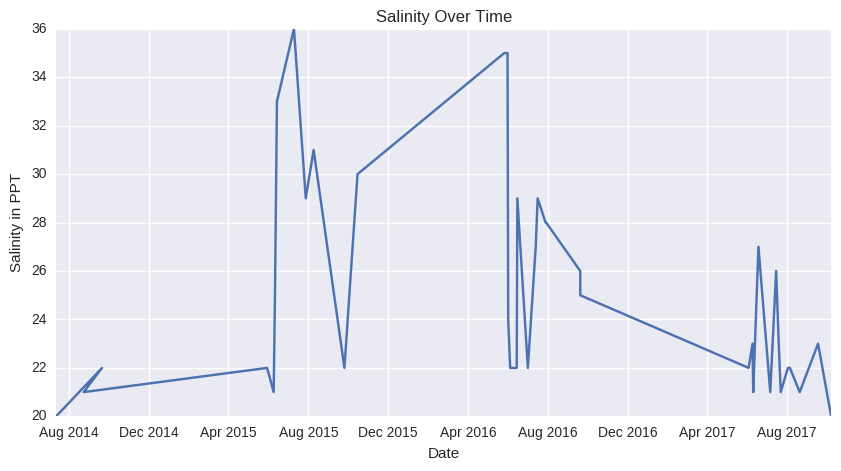

In [179]:
plt.figure(figsize=(10,5))
plt.title('Salinity Over Time')
plt.ylabel('Salinity in PPT')
plt.xlabel('Date')
plt.plot(sal_df)
plt.savefig('../Graphs/Salinity_Graph')